## What is cross-validation?


####  Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.

In [ ]:
import pandas as pd
df = pd.read_csv('winequality_red.csv')

In [ ]:
df

In [ ]:
#mapping the quality

quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}

In [ ]:
#Column to value
df.loc[:,"quality"] = df.quality.map(quality_mapping)

### Decision Trees for the model

In [ ]:
# Reshuffling the data
df = df.sample(frac = 1).reset_index(drop=True)

In [ ]:
df_train = df.head(1000)

In [ ]:
df_test = df.tail(599)

## Let's train the model

In [ ]:
from sklearn import tree
from sklearn import metrics

In [ ]:
## Initialise decision tree classifier class with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

## Choose the column you want to train the model
cols = ['fixed acidity',
        'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

In [ ]:
## Train the model on provided features
clf.fit(df_train[cols],df_train.quality)

In [ ]:
## Let's check the accuracy

# generate predictions on the training set
train_predictions =clf.predict(df_train[cols])

# generate predictions on test set
test_predictions = clf.predict(df_test[cols])

#### Model Accuracy

In [ ]:
# Train Accuracy
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

In [ ]:
# Test Accuracy
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [ ]:
test_accuracy

In [ ]:
train_accuracy

# Let's increase the max_depth to 7 and then check the accuracy

In [ ]:
## Initialise decision tree classifier class with max_depth of 3
clf_2 = tree.DecisionTreeClassifier(max_depth=7)

## Choose the column you want to train the model
cols = ['fixed acidity',
        'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

In [ ]:
## Train the model on provided features
clf_2.fit(df_train[cols],df_train.quality)

In [ ]:
## Let's check the accuracy

# generate predictions on the training set
train_predictions =clf_2.predict(df_train[cols])

# generate predictions on test set
test_predictions = clf_2.predict(df_test[cols])

In [ ]:
train_accuracy, test_accuracy

In [ ]:
### Let's plot the whole process for different max_depth values

In [ ]:
from sklearn import tree
from sklearn import metrics

# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Size for the labels
matplotlib.rc('xtick',labelsize =20)
matplotlib.rc('ytick',labelsize =20)

In [ ]:
## this line ensures that the plot displays inside the notebook
%matplotlib inline

In [ ]:
## initialise list to store accuracies
# for training and test data
# We'll start with 50% accuracy

train_accuracies =[0.5]
test_accuracies =[0.5]

In [ ]:
# Iterate over few depth values
for depth in range (1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
#Column features for training
    cols = ['fixed acidity',
        'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']

In [ ]:
# Fit the model
clf.fit(df_train[cols],df_train.quality)

# generate predictions on the training set
train_predictions =clf.predict(df_train[cols])

# generate predictions on test set
test_predictions = clf.predict(df_test[cols])

In [ ]:
## Calculate training and test accuracies
# Train
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
# Test Accuracy
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [ ]:
## Append accuracies
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

In [ ]:
## Create the plot
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label = 'Train Accuracy')
plt.plot(test_accuracies,label = 'Test Accuracy')
plt.legend(loc ='upper left',prop ={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("Max_Depth",size = 20)
plt.ylabel("Accuracy",size = 20)
plt.show()

In [ ]:
## What is Overfitting?
When the model fits prefectly on the training set and perform poorly when it comes to the test set this phenomenon is known as Overfitting

<b>

# Cross-Validation

### Cross validation is dividing training data into few parts. We train the model on some of these parts and test on the remaining parts

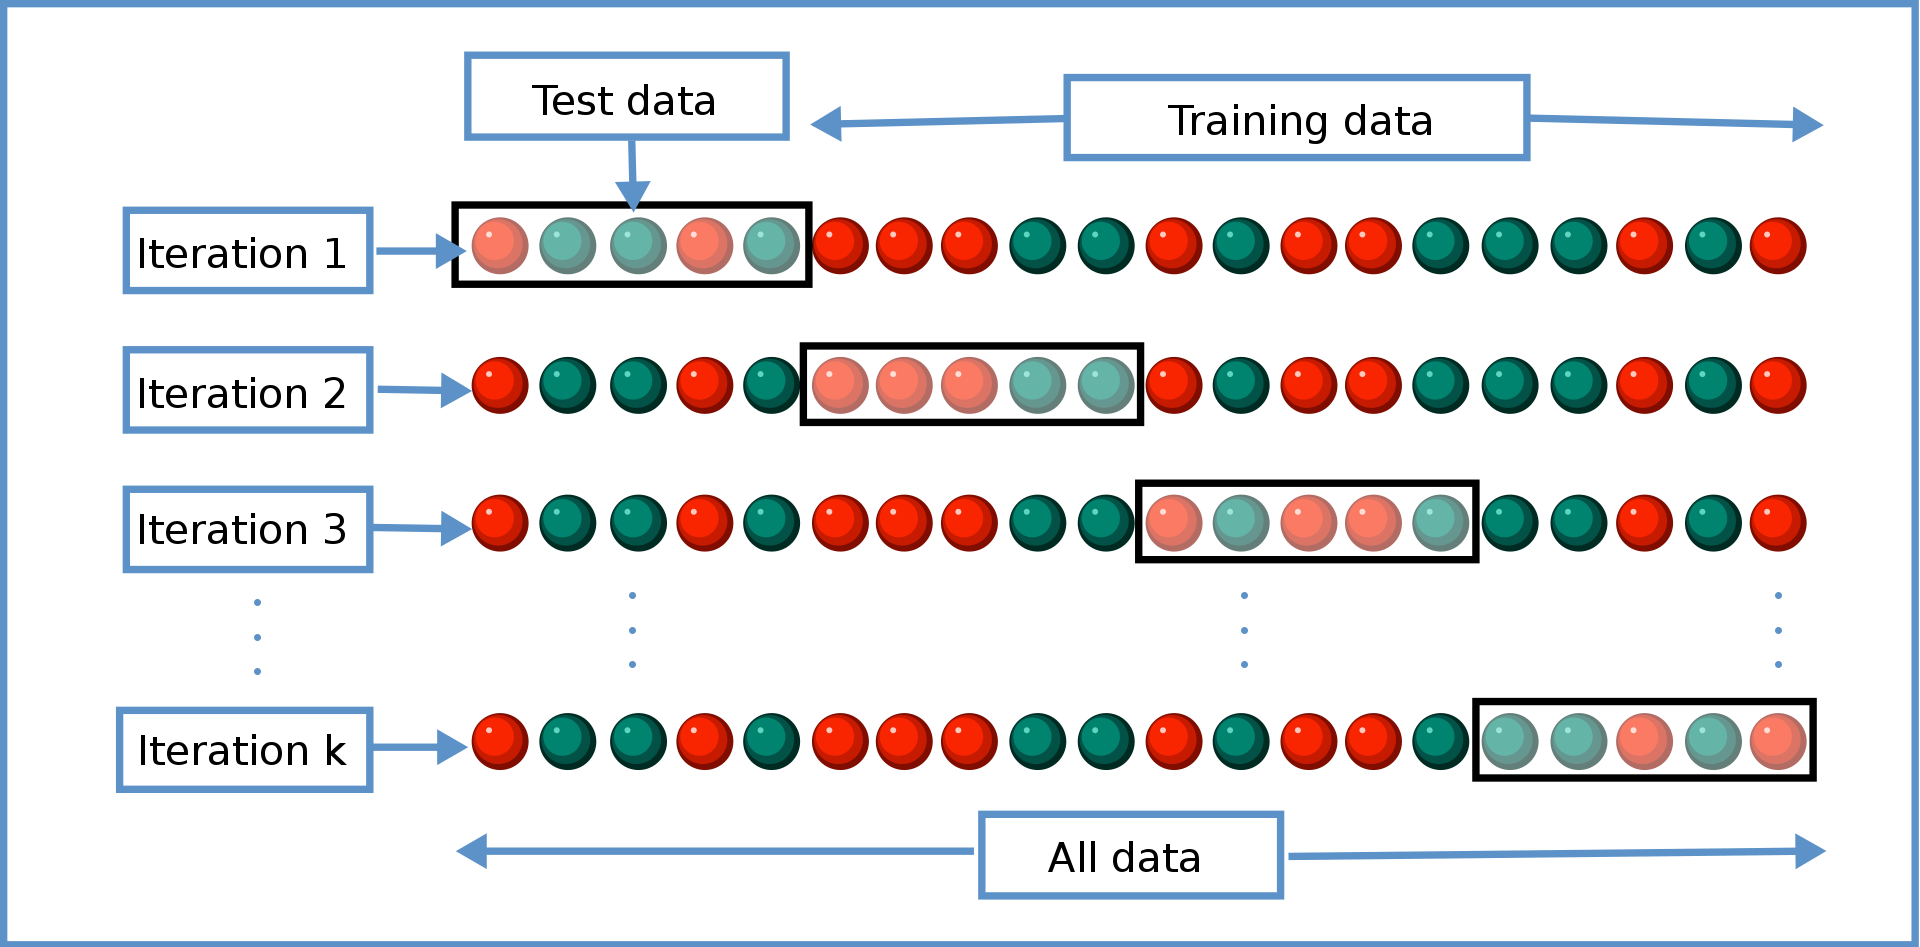

### There are few cross validation techniques which are the most popular and widely used

In [ ]:
### These include
    - k-fold cross validation
    - Stratified k-fold cross validation
    - Holdout based validation
    - Leave one out cross validation
    - group k-fold cross validation

## K-fold Cross validation

### We can use this process in any kind of dataset as long as it is not skewed or biased

#### K-Folds technique is a popular and easy to understand, it generally results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.

In [62]:
# import pandas and model_selection module of sci-kit learn
import pandas as pd
from sklearn import model_selection

In [63]:
# Every module in Python has a special attribute called __name__. 
# The value of __name__ attribute is set to “__main__” when module is run as main program. Otherwise, 
# the value of __name__ is set to contain the name of the module.
if __name__ == "__main__":
# Training data
    df = df_train

In [64]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.500000,3,-1
1,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,3,-1
2,9.2,0.360,0.34,1.6,0.062,5.0,12.0,0.99667,3.20,0.67,10.500000,3,-1
3,7.7,0.270,0.68,3.5,0.358,5.0,10.0,0.99720,3.25,1.08,9.900000,4,-1
4,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.800000,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.800000,3,-1
996,9.9,0.400,0.53,6.7,0.097,6.0,19.0,0.99860,3.27,0.82,11.700000,4,-1
997,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.800000,3,-1
998,9.1,0.680,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.500000,3,-1


In [65]:
# We create a new column called kfold and fill it with -1
df["kfold"] = -1

In [66]:
# Next step is to randomise the data
df = df.sample(frac=1).reset_index(drop =True)

In [67]:
# Initiate kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [68]:
# Fill the new Kfold column
for fold, (trn_,val_) in enumerate(kf.split(X=df)):
    df.loc[val_,'kfold'] = fold


In [69]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.2,0.52,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,3,0
1,8.3,0.31,0.39,2.4,0.078,17.0,43.0,0.99444,3.31,0.77,12.5,4,0
2,8.4,0.65,0.60,2.1,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,2,0
3,10.1,0.31,0.35,1.6,0.075,9.0,28.0,0.99672,3.24,0.83,11.2,4,0
4,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.0,0.43,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,3,4
996,6.8,0.67,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,2,4
997,7.8,0.32,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,4,4
998,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,3,4


In [70]:
# Save the new CSV with kfold column
df.to_csv("df_kfold.cvs",index = False)

In [71]:
## Stratified K-Fold

In [72]:
### If you have a skewed dataset i.e. 90% of data is a positive sample and 10% of data is negative sample you don't want to use K-Fold cross-validation

In [73]:
# import pandas and model_selection module from scikit learn
import pandas as pd
from sklearn import model_selection

In [74]:
if __name__ == '__main__':
    # Training set
    df = df_train

In [75]:
# Create a new colum for k-fold and fill it with -1
df['kfold'] = -1

In [76]:
# Next step is to randomise the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [77]:
# Fetch targets
y = df.quality.values

In [78]:
# initiate the k-fold class for model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

In [79]:
# Fill the new kfold column
for f, (t_,v_) in enumerate(kf.split(X=df,y=y)):
    df.loc[v_,'kfold'] = f

In [80]:
df.to_csv("Train_fold_Kstrat.csv",index=False)

In [81]:
## For wine dataset the distribution of lables is 

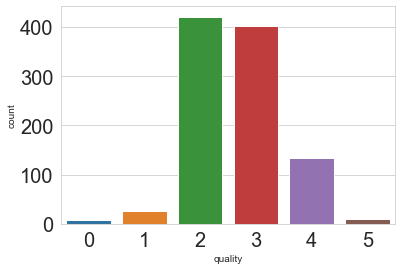

In [82]:
b= sns.countplot(x='quality',data=df)

In [83]:
b.set_xlabel("Quality",fontsize = 20)
b.set_ylabel("Count",fontsize = 20)

Text(16.200000000000003, 0.5, 'Count')

## If it is a standard classification problem choose Statified k-fold blindly

# Cross Validation for Regression problems

### We can't use stratified K-fold validation, but mostly simple k-fold cross validation works on any regression problem

In [88]:
# Stratified k-fold regression
import pandas as pd
import numpy as np

In [89]:
from sklearn import datasets
from sklearn import model_selection

/Users/apple/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [94]:
def create_folds(data):
    # Create a new column called kfold and fill it with -1
    data['kfold'] = -1
    # Next step is to randomise the rows
    data = data.sample(frac =1).reset_index(drop =True)
    #calculate the number of bins using Sturges Rule
    # Take the floor of the values and round it
    num_bins = int(np.floor(1+np.log2(len(data))))
    #bin Targets
    data.loc[:,"bins"] =pd.cut(
        data["target"],bins = num_bins,labels = False
    )
    # Initialse the kfold class from model_selection from sklearn module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    #instead of targets we use bins
    for f,(t_,v_) in enumerate(kf.split(X = data,y = data.bins.values)):
        data.loc[v_,'kfold'] = f
    #Drop the bins column
    data = data.drop('bins',axis =1)
    ## Return dataframe with folds
    return data


In [105]:
if __name__ == "__main__":
# We create a sample dataset with 15000 samples
# 100 features and 1 target
    X,y = datasets.make_regression(
    n_samples=15000,n_features=100,n_targets=1)

# Create a dataframe out of our numpy array
df =df.DataFrame(X,colorsumns =[f"f_{i}" for i in range(X.shape[1])

df.loc[:, "target"] =y
# Create folds
df = create_folds(df)

SyntaxError: invalid syntax (<ipython-input-105-af9551817f69>, line 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,6.7,0.560,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,10.2,2,0
1,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,3,0
2,6.5,0.615,0.00,1.9,0.065,9.0,18.0,0.99720,3.46,0.65,9.2,2,0
3,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,3,0
4,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,2,4
996,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,3,4
997,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,4,4
998,7.8,0.500,0.12,1.8,0.178,6.0,21.0,0.99600,3.28,0.87,9.8,3,4
